# Predicting Products Sold from Product Advertising

#### About this dataset

- **TV:** Advertising costs on television.
- **Billboards:** Advertising costs associated with billboards.
- **Google_Ads:** Advertising costs incurred on Google Ads.
- **Social_Media:** Advertising expenses on various social media platforms.
- **Influencer_Marketing:** Costs related to influencer marketing.
- **Affiliate_Marketing:** Expenditure on affiliate marketing efforts.
- **Product_Sold:** Number of units sold corresponding to the advertising costs on various platforms.

#### Notebook Layout

1. Importing Data
2. Preprocessing
3. Exploratory Data Analysis (EDA)
4. Train/Test Split
5. Standardization
6. Model Training
7. Model Prediction
-------------------------------------------------------

## **1.) Importing Data**
-----------------------------------

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data in

df = pd.read_csv('/kaggle/input/product-advertising-data/Advertising_Data.csv')
df.head()

TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0

In [3]:
df.shape

(300, 7)

## **2.) Preprocessing**
-----------------------------------

In [4]:
df.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

**There are no missing values therefore no further steps are required.**

In [5]:
df.duplicated().sum()

0

**No duplicates were found so there is nothing tha needs to be dropped.**

In [6]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [7]:
df.rename(columns={
    'TV' : 'TV_Ads',
    'Billboards' : 'Billboard_Ads',
    'Social_Media' : 'Social_Media_Ads'
}, inplace=True)

df.columns

Index(['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

#### **Feature Engineering**

*I will be creating features for the following reasons:*
1. Improve Model Performance
2. Reduce Overfitting
3. Enhance Interpretability

*Here are the features I'm adding:*
- Total Ad Spend
- Average Ad Spend
- Cost Per Sale
- Ad ROI

In [8]:
# Total Ad Spend

df['Total_Ad_Spend'] = df['TV_Ads'] + df['Billboard_Ads'] + df['Google_Ads'] + df['Social_Media_Ads']

In [9]:
# Average Ad Spend

df['Average_TV_Spend'] = df['TV_Ads'] / df['Product_Sold']
df['Average_Billboard_Spend'] = df['Billboard_Ads'] / df['Product_Sold']
df['Average_Google_Spend'] = df['Google_Ads'] / df['Product_Sold']
df['Average_Social_Media_Spend'] = df['Social_Media_Ads'] / df['Product_Sold']

In [10]:
# Cost Per Sale

df['Cost_Per_Sale'] = df['Total_Ad_Spend'] / df['Product_Sold']

In [11]:
# Ad ROI

df['TV_ROI'] = (df['Product_Sold'] * df['TV_Ads']) / df['Total_Ad_Spend']
df['Billboard_ROI'] = (df['Product_Sold'] * df['Billboard_Ads']) / df['Total_Ad_Spend']
df['Google_ROI'] = (df['Product_Sold'] * df['Google_Ads']) / df['Total_Ad_Spend']
df['Social_Media_ROI'] = (df['Product_Sold'] * df['Social_Media_Ads']) / df['Total_Ad_Spend']

In [12]:
df.head()

TV_Ads  Billboard_Ads  Google_Ads  Social_Media_Ads  Influencer_Marketing  \
0  281.42         538.80      123.94            349.30                242.77   
1  702.97         296.53      558.13            180.55                781.06   
2  313.14         295.94      642.96            505.71                438.91   
3  898.52          61.27      548.73            240.93                278.96   
4  766.52         550.72      651.91            666.33                396.33   

   Affiliate_Marketing  Product_Sold  Total_Ad_Spend  Average_TV_Spend  \
0               910.10        7164.0         1293.46          0.039283   
1               132.43        5055.0         1738.18          0.139064   
2               464.23        6154.0         1757.75          0.050884   
3               432.27        5480.0         1749.45          0.163964   
4               841.93        9669.0         2635.48          0.079276   

   Average_Billboard_Spend  Average_Google_Spend  Average_Social_Media_Spend  \
0                 0.075209              0.017300                    0.048758   
1                 0.058661              0.110411                    0.035717   
2                 0.048089              0.104478                    0.082176   
3                 0.011181              0.100133                    0.043965   
4                 0.056957              0.067423                    0.068914   

   Cost_Per_Sale       TV_ROI  Billboard_ROI   Google_ROI  Social_Media_ROI  
0       0.180550  1558.682047    2984.215360   686.458151       1934.644442  
1       0.343854  2044.387434     862.372798  1623.161669        525.078099  
2       0.285627  1096.324028    1036.105681  2251.045848       1770.524443  
3       0.319243  2814.535768     191.922947  1718.849010        754.692275  
4       0.272570  2812.194318    2020.471292  2391.715281       2444.619109

## **2.) EDA**
-----------------------------------

In [13]:
df.describe()

TV_Ads  Billboard_Ads  Google_Ads  Social_Media_Ads  \
count  300.000000     300.000000  300.000000        300.000000   
mean   517.431000     502.644933  512.444133        489.800100   
std    288.114792     275.842369  285.422376        273.883915   
min      1.040000       3.630000   14.860000         11.690000   
25%    273.090000     277.912500  250.530000        265.612500   
50%    513.970000     533.020000  528.965000        486.385000   
75%    774.275000     745.005000  763.345000        695.117500   
max    998.100000     995.320000  999.230000        996.160000   

       Influencer_Marketing  Affiliate_Marketing  Product_Sold  \
count            300.000000           300.000000    300.000000   
mean             465.732567           484.430633   7031.523333   
std              288.314080           277.955458   1703.614951   
min                0.770000             6.740000   2259.000000   
25%              214.480000           267.677500   5922.500000   
50%              480.355000           451.315000   7051.000000   
75%              703.092500           721.065000   8278.000000   
max              999.830000           987.580000  12227.000000   

       Total_Ad_Spend  Average_TV_Spend  Average_Billboard_Spend  \
count      300.000000        300.000000               300.000000   
mean      2022.320167          0.074401                 0.070921   
std        575.320974          0.041910                 0.037509   
min        320.640000          0.000460                 0.000810   
25%       1636.862500          0.044012                 0.044287   
50%       2011.075000          0.070949                 0.071811   
75%       2414.002500          0.101455                 0.097580   
max       3611.510000          0.204533                 0.187642   

       Average_Google_Spend  Average_Social_Media_Spend  Cost_Per_Sale  \
count            300.000000                  300.000000     300.000000   
mean               0.075680                    0.069960       0.290962   
std                0.047227                    0.038370       0.061922   
min                0.002054                    0.002519       0.073139   
25%                0.040840                    0.040256       0.248155   
50%                0.069970                    0.070672       0.290140   
75%                0.104455                    0.095161       0.332776   
max                0.398721                    0.188182       0.450340   

            TV_ROI  Billboard_ROI   Google_ROI  Social_Media_ROI  
count   300.000000     300.000000   300.000000        300.000000  
mean   1812.303473    1780.122902  1728.123721       1710.973236  
std    1015.696788    1008.138488   906.251263        970.882859  
min       2.404421      12.197639    68.905453         80.857392  
25%     985.671490     896.025924   995.542381        925.931761  
50%    1798.205496    1818.383330  1741.742820       1651.441673  
75%    2591.755171    2555.637511  2460.547373       2476.094955  
max    4319.175923    4450.198094  4035.304265       4225.272730

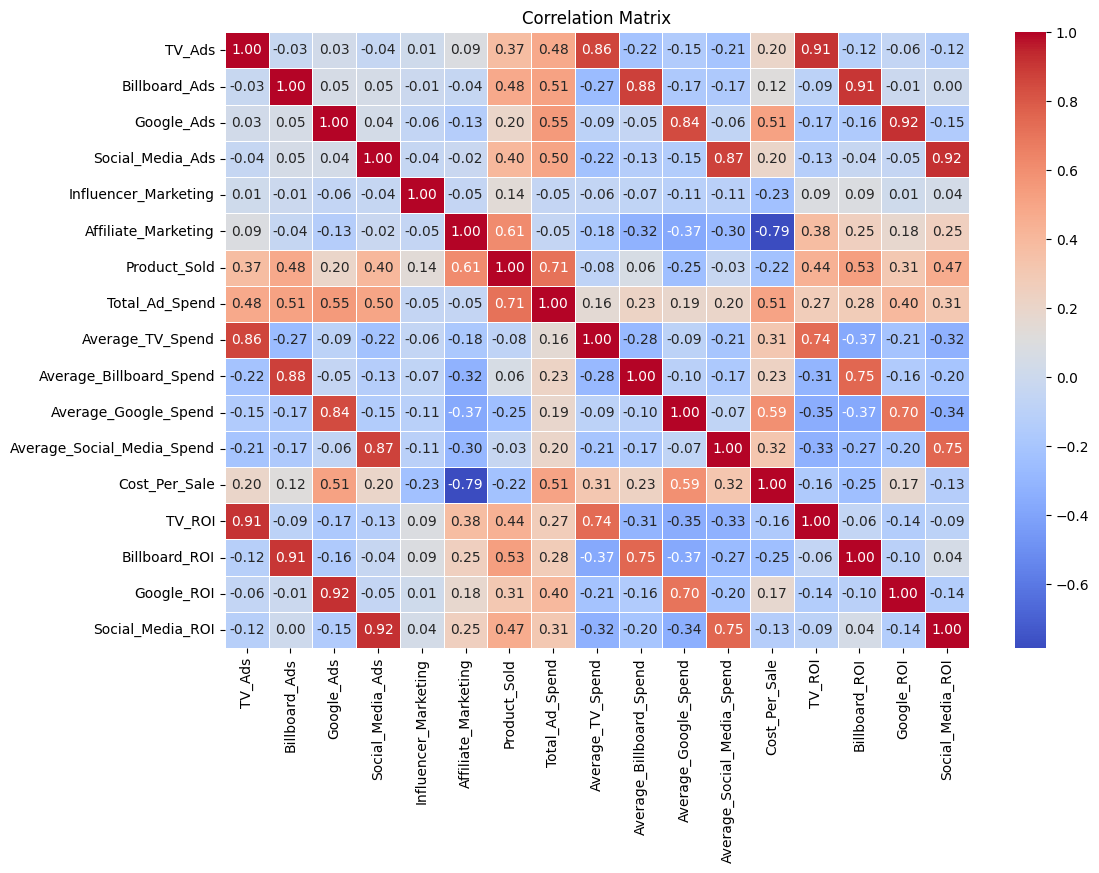

In [14]:
# Plotting Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

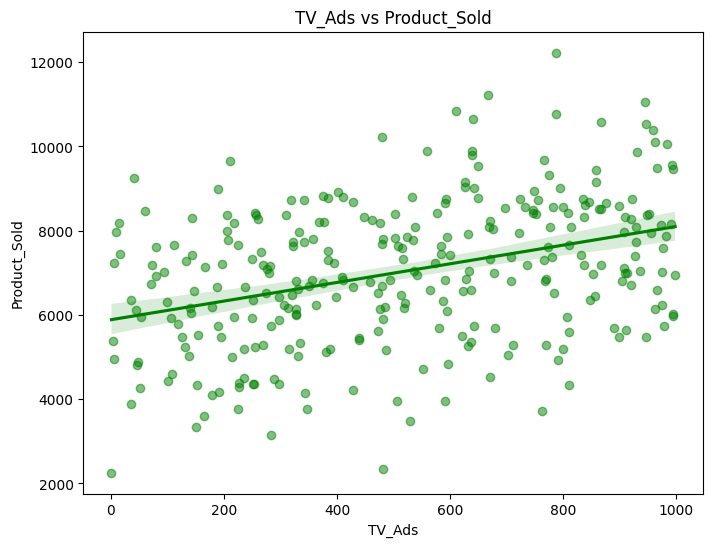

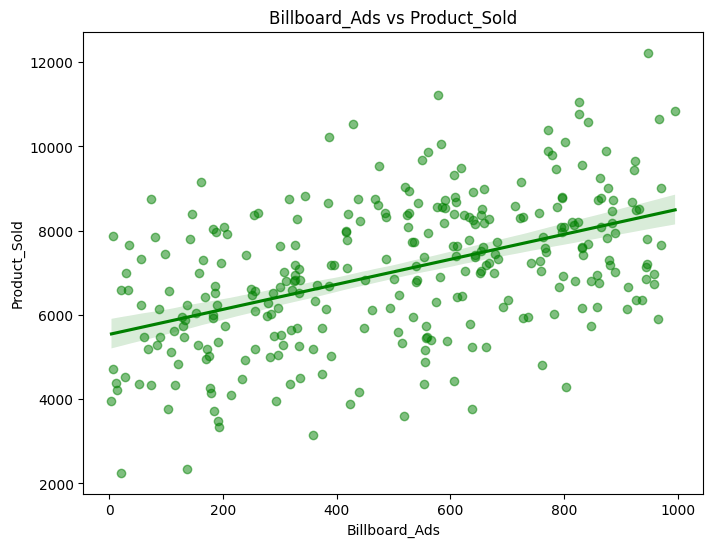

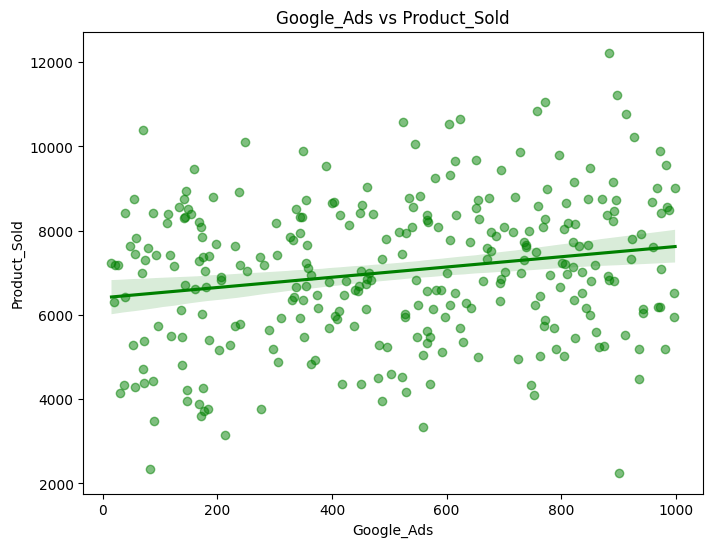

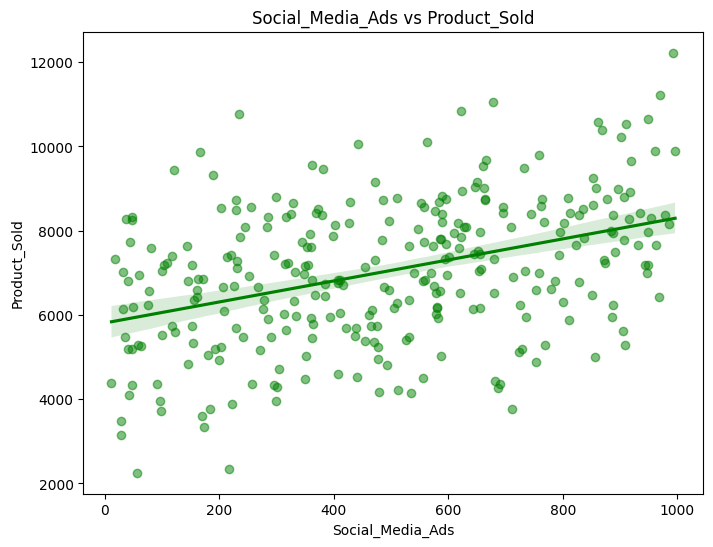

In [15]:
# Using a For Loop to create regression plots for each advertising variable


target_variable = 'Product_Sold'

# Filtering columns that contain 'Ads' in their name
ad_columns = [col for col in df.columns if 'Ads' in col]

# Creating regression plots for each advertising variable
for column in ad_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y=target_variable, data=df, scatter_kws={'alpha':0.5}, color='green')
    plt.title(f'{column} vs {target_variable}')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.show()

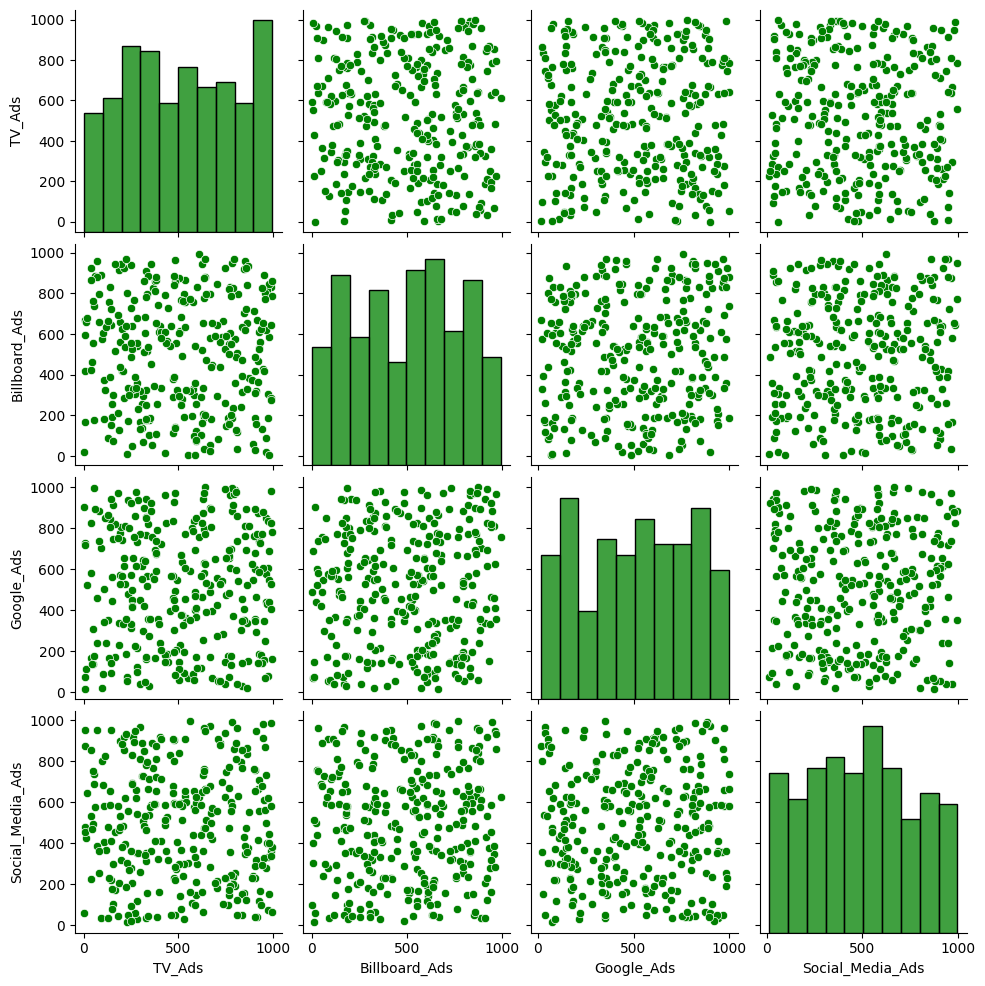

In [16]:
pair_df = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads']]

sns.pairplot(pair_df, plot_kws={'color': 'green'}, diag_kws={'color': 'green'})

## 4.) **Train Test Split**
------------------------------

In [17]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# Rearranging columns so target variable is last for iloc purposes.

df = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
         'Influencer_Marketing', 'Affiliate_Marketing','Total_Ad_Spend', 
         'Average_TV_Spend', 'Average_Billboard_Spend','Average_Google_Spend', 
         'Average_Social_Media_Spend', 'Cost_Per_Sale','TV_ROI', 'Billboard_ROI', 
         'Google_ROI', 'Social_Media_ROI', 'Product_Sold']]

In [19]:
# Defining X and y variables

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
# Performing Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X

TV_Ads  Billboard_Ads  Google_Ads  Social_Media_Ads  \
0    281.42         538.80      123.94            349.30   
1    702.97         296.53      558.13            180.55   
2    313.14         295.94      642.96            505.71   
3    898.52          61.27      548.73            240.93   
4    766.52         550.72      651.91            666.33   
..      ...            ...         ...               ...   
295  770.05         501.36      694.60            172.26   
296  512.38         250.83      373.78            366.95   
297  998.10         858.75      781.06             60.61   
298  322.35         681.22      640.29            343.65   
299  476.45         884.77      301.79            802.30   

     Influencer_Marketing  Affiliate_Marketing  Total_Ad_Spend  \
0                  242.77               910.10         1293.46   
1                  781.06               132.43         1738.18   
2                  438.91               464.23         1757.75   
3                  278.96               432.27         1749.45   
4                  396.33               841.93         2635.48   
..                    ...                  ...             ...   
295                572.26               410.56         2138.27   
296                987.14               509.03         1503.94   
297                174.63               213.53         2698.52   
298                534.22               648.71         1987.51   
299                434.82               401.69         2465.31   

     Average_TV_Spend  Average_Billboard_Spend  Average_Google_Spend  \
0            0.039283                 0.075209              0.017300   
1            0.139064                 0.058661              0.110411   
2            0.050884                 0.048089              0.104478   
3            0.163964                 0.011181              0.100133   
4            0.079276                 0.056957              0.067423   
..                ...                      ...                   ...   
295          0.112400                 0.073181              0.101387   
296          0.079108                 0.038726              0.057709   
297          0.143632                 0.123579              0.112399   
298          0.041663                 0.088047              0.082757   
299          0.058196                 0.108070              0.036862   

     Average_Social_Media_Spend  Cost_Per_Sale       TV_ROI  Billboard_ROI  \
0                      0.048758       0.180550  1558.682047    2984.215360   
1                      0.035717       0.343854  2044.387434     862.372798   
2                      0.082176       0.285627  1096.324028    1036.105681   
3                      0.043965       0.319243  2814.535768     191.922947   
4                      0.068914       0.272570  2812.194318    2020.471292   
..                          ...            ...          ...            ...   
295                    0.025144       0.312111  2467.234049    1606.353435   
296                    0.056654       0.232197  2206.660678    1080.246493   
297                    0.008722       0.388332  2570.222529    2211.380220   
298                    0.044416       0.256884  1254.847498    2651.860438   
299                    0.097997       0.301125  1582.233532    2938.215474   

      Google_ROI  Social_Media_ROI  
0     686.458151       1934.644442  
1    1623.161669        525.078099  
2    2251.045848       1770.524443  
3    1718.849010        754.692275  
4    2391.715281       2444.619109  
..           ...               ...  
295  2225.492852        551.919664  
296  1609.753753       1580.339076  
297  2011.319516        156.077735  
298  2492.527700       1337.764363  
299  1002.208538       2664.342456  

[300 rows x 16 columns]

In [22]:
y

0      7164.0
1      5055.0
2      6154.0
3      5480.0
4      9669.0
        ...  
295    6851.0
296    6477.0
297    6949.0
298    7737.0
299    8187.0
Name: Product_Sold, Length: 300, dtype: float64

## 5.) **Standardization**
------------------------------

In [23]:
# Standardizing the dataset

scaler=StandardScaler()
scaler

StandardScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Note:** I did not fit the testing set(X_test). Fitting the testing set to a linear regression model would imply incorporating the testing data into the model-building process, which would defeat the purpose of having an independent evaluation set. Testing data should remain separate from the training data to provide an unbiased estimate of the model's performance on new, unseen data.

## 6.) **Model Training**
------------------------------

In [25]:
model = LinearRegression()
model

LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
print('Coefficients:', model.coef_)

Coefficients: [-4.48321366e-13 -2.27373675e-12 -8.82849349e-13 -5.88362692e-13
 -1.09978693e-12 -2.61834998e-12 -4.54747351e-13  2.84217094e-13
  3.97903932e-13  4.19220214e-13 -1.84741111e-13 -1.50635060e-12
  1.01095214e+03  1.00649402e+03  9.01319186e+02  9.62376492e+02]


In [28]:
print('Intercept:', model.intercept_)

Intercept: 6960.0375


In [29]:
# Lets ee which parameters the model has been trained on
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## 7.) **Model Prediction**
------------------------------

In [30]:
reg_pred = model.predict(X_test)
reg_pred

array([ 5728.,  8574.,  8277.,  8652.,  8297.,  4358., 10841.,  8368.,
        7627.,  4212.,  5897.,  5957.,  4344.,  8943.,  6348.,  7848.,
        7656.,  7455.,  8687.,  9498.,  4151.,  7803.,  6797.,  9540.,
        7395.,  8792.,  2353.,  6851.,  6430.,  8396.,  7937.,  6838.,
        7383.,  9001.,  9144.,  6831.,  3726.,  5519.,  6356.,  5688.,
        9553.,  7838.,  6828., 10543.,  6860.,  7723.,  8683.,  5235.,
        8332.,  5934.,  7282.,  5292.,  8230.,  8744.,  6949.,  8533.,
        6959.,  8504.,  7964.,  8564.])

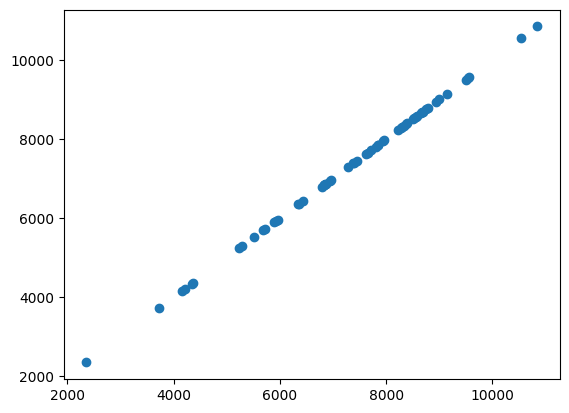

In [31]:
# Scatter Prediction

plt.scatter(y_test, reg_pred)

**There is a very strong linear trend which means the model is performing extremely well.**

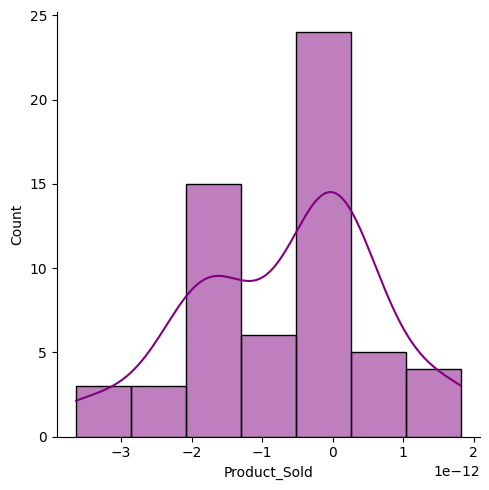

In [32]:
# Analyzing Residuals

residuals = y_test-reg_pred
sns.displot(residuals, kde=True, color='purple')

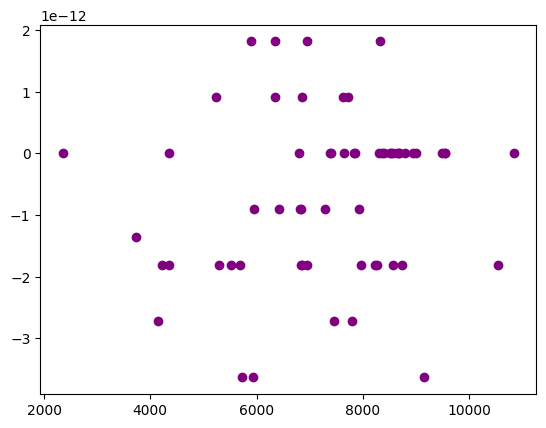

In [33]:
# Scatter with respect to predictions & residuals

plt.scatter(reg_pred, residuals, color='purple')

In [34]:
print('Mean Squared Error:', mean_squared_error(y_test, reg_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, reg_pred))

print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, reg_pred)))

Mean Squared Error: 2.2092615526937115e-24
Mean Absolute Error: 1.053498029553642e-12
Root Mean Squared Error 1.4863584872747596e-12


In [35]:
# R2

score = r2_score(y_test, reg_pred)
print('R2:', score)

R2: 1.0


In [36]:
# Adjusted R2

adj_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2:', adj_r2)

Adjusted R2: 1.0
